In [1]:
import xlrd, xlwt
workbook = xlrd.open_workbook('DATA_strategy-16may.xlsx')
first_sheet = workbook.sheet_by_index(0) # get the first worksheet
import numpy as np


In [2]:
FB= [] #Best Bid price
FA= [] #Best Ask price
MovingAVR1 = []
MovingAVR2 = []
MovingAVR3 = []
MovingAVR4 = []
MovingAVR5 = []
IndicatorBUY=[]
IndicatorSELL=[]
BIDSize1 =[]
ASKSize1 =[]
BIDSize2 =[]
ASKSize2 =[]
BIDSize3 =[]
ASKSize3 =[]
BIDSize4 =[]
ASKSize4 =[]
BIDSize5 =[]
ASKSize5 =[]
PNL =[]
Time=[]
averageFB=[]
TrendIndic1=[]
TrendIndic2=[]
TrendIndic3=[]
TrendIndic4=[]
TrendIndic5=[]
BookIndic1=[]
BookIndic2=[]
AverageDif=[]
reg=[]
IndicatorBUY=[]
IndicatorSELL=[]
R=[]
Intersept=[]

##################################Parameters
lot=70
Maxposition =8
Minposition=-8
Threshold =150


for i in range(len(first_sheet.col_values(0))):
    Intersept.append(0)
    FB.append(0)
    FA.append(0)
    MovingAVR1.append(0)
    MovingAVR2.append(0)
    MovingAVR3.append(0)
    MovingAVR4.append(0)
    MovingAVR5.append(0)
    IndicatorBUY.append(0)
    IndicatorSELL.append(0)
    BIDSize1.append(0)
    ASKSize1.append(0)
    BIDSize2.append(0)
    ASKSize2.append(0)
    BIDSize3.append(0)
    ASKSize3.append(0)
    BIDSize4.append(0)
    ASKSize4.append(0)
    BIDSize5.append(0)
    ASKSize5.append(0)
    PNL.append(0)
    Time.append(0)
    averageFB.append(0)
    TrendIndic1.append(0)
    TrendIndic2.append(0)
    TrendIndic3.append(0)
    TrendIndic4.append(0)
    TrendIndic5.append(0)
    BookIndic1.append(0)
    BookIndic2.append(0)
    AverageDif.append(0)
    reg.append(0)
    IndicatorBUY.append(0)
    IndicatorSELL.append(0)
    R.append(0)
    
for i in range(len(first_sheet.col_values(0))):
    Time[i]=first_sheet.row_values(i)[0]
    FB[i]=lot*float(first_sheet.row_values(i)[1])
    FA[i]=lot*float(first_sheet.row_values(i)[2])
    BIDSize1[i]=float(first_sheet.row_values(i)[3])
    ASKSize1[i]=float(first_sheet.row_values(i)[4])
    BIDSize2[i]=float(first_sheet.row_values(i)[5])
    BIDSize3[i]=float(first_sheet.row_values(i)[6])
    BIDSize4[i]=float(first_sheet.row_values(i)[7])
    BIDSize5[i]=float(first_sheet.row_values(i)[8])
    ASKSize2[i]=float(first_sheet.row_values(i)[9])
    ASKSize3[i]=float(first_sheet.row_values(i)[10])
    ASKSize4[i]=float(first_sheet.row_values(i)[11])
    ASKSize5[i]=float(first_sheet.row_values(i)[12])
    averageFB[i]=(FB[i]+FA[i])/2.0

In [3]:
###############calculating MovingAVR1

for i in range(len(first_sheet.col_values(0))):
    if i>100:
        for j in range(i-10,i,1):
            MovingAVR1[i]=MovingAVR1[i]+averageFB[j]
        MovingAVR1[i]=MovingAVR1[i]/10
        
###############calculating MovingAVR2

for i in range(len(first_sheet.col_values(0))):
    if i>100:
        for j in range(i-20,i,1):
            MovingAVR2[i]=MovingAVR2[i]+averageFB[j]
        MovingAVR2[i]=MovingAVR2[i]/20
        
        
###############calculating MovingAVR3
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        for j in range(i-30,i,1):
            MovingAVR3[i]=MovingAVR3[i]+averageFB[j]
        MovingAVR3[i]=MovingAVR3[i]/30 
        
###############calculating MovingAVR4
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        for j in range(i-40,i,1):
            MovingAVR4[i]=MovingAVR4[i]+averageFB[j]
        MovingAVR4[i]=MovingAVR4[i]/40 
        
###############calculating MovingAVR5
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        for j in range(i-50,i,1):
            MovingAVR5[i]=MovingAVR5[i]+averageFB[j]
        MovingAVR5[i]=MovingAVR5[i]/50 

In [4]:
######################################################Trend Indicator1
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        TrendIndic1[i]=MovingAVR1[i]-averageFB[i]

######################################################Trend Indicator2
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        TrendIndic2[i]=MovingAVR2[i]-averageFB[i]
        
######################################################Trend Indicator3
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        TrendIndic3[i]=MovingAVR3[i]-averageFB[i]
######################################################Trend Indicator4
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        TrendIndic4[i]=MovingAVR4[i]-averageFB[i]
        
######################################################Trend Indicator5
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        TrendIndic5[i]=MovingAVR5[i]-averageFB[i]

######################################################Book Indicator1    
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        BookIndic1[i]=-BIDSize1[i]-BIDSize2[i]-BIDSize3[i]-BIDSize4[i]-BIDSize5[i]+ASKSize1[i]+ASKSize2[i]+ASKSize3[i]+ASKSize4[i]+ASKSize5[i]

######################################################Book Indicator2   
for i in range(len(first_sheet.col_values(0))):
    if i>100:
        BookIndic2[i]=-BIDSize1[i]-BIDSize2[i]+ASKSize1[i]+ASKSize2[i]

        
######################################################
for i in range(len(first_sheet.col_values(0))-1):
    if i>100:        
        AverageDif[i]=averageFB[i+1]-averageFB[i]

In [7]:
 TrendIndic4[100:2000:100]

[0,
 131.25,
 56.875,
 214.375,
 -65.625,
 -30.625,
 280.0,
 0.0,
 -271.25,
 70.0,
 0.0,
 105.0,
 245.0,
 0.0,
 0.0,
 424.375,
 0.0,
 -43.75,
 223.125]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0.99999908093533629, 0.99999905336592165, 0.99999794909696005, 0.99999152840086825, 0.99994611564578173, 0.99993409397931721, 0.99316556891601437, 0.99311348657273224, 0.94958050119370085, 0.93609616998713252, 0.93276966202155931, 0.93117357778442778, 0.7370368313966198, 0.72038973734339651, 0.70970332054226226, 0.67717450579573257, 0.66459580884081837, 0.66131396268575449, 0.66128213701598604, 0.66032246321045385, 0.64461141308184788, 0.64104166639182369, 0.63403746960035723, 0.61222007153956415, 0.60478411510783503, 0.60357080851300926, 0.60348663407631919, 0.60327853303075507, 0.6017796864534275, 0.60070483531052421, 0.5892771368390769, 0.58816057416823186, 0.570562025863

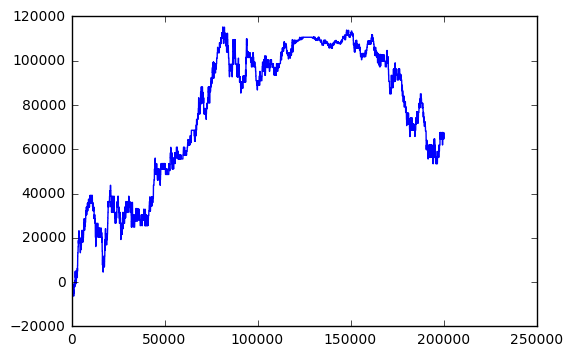

In [8]:
#####################################################      
from sklearn.linear_model import Ridge

def function(mas1,mas2,mas3,mas4,mas5,mas6,mas7,mas8,a1,a2,a3,a4,a5,a6,a7):
    u = np.vstack([mas1, mas2, mas3,mas4,mas5,mas6,mas7]).T
    regr = Ridge(alpha=2, fit_intercept=True)
    regr.fit(u, mas8)
    return regr.predict([[a1,a2,a3,a4,a5,a6,a7]]), regr.score(u, mas8, sample_weight=None),regr.intercept_

mas1=[]
mas2=[]
mas3=[]
mas4=[]
mas5=[]
mas6=[]
mas7=[]
mas8=[]
#print "i'm here1"    

for i in range(len(first_sheet.col_values(0))):
    if i>101:
        for j in range(i-100,i-1,1):
            mas1.append(TrendIndic1[j])
            mas2.append(TrendIndic2[j])
            mas3.append(TrendIndic3[j])
            mas4.append(TrendIndic4[j])
            mas5.append(TrendIndic5[j])
            mas6.append(BookIndic1[j])
            mas7.append(BookIndic2[j])
            mas8.append(AverageDif[j])
        reg[i],R[i],Intersept[i]=function(mas1,mas2,mas3,mas4,mas5,mas6,mas7,mas8,TrendIndic1[i-1], TrendIndic2[i-1], TrendIndic3[i-1],TrendIndic4[i-1],TrendIndic5[i-1],BookIndic1[i-1],BookIndic2[i-1]) 
        del mas1[:]
        del mas2[:]
        del mas3[:]
        del mas4[:]
        del mas5[:]
        del mas6[:]
        del mas7[:]
        del mas8[:]
        
print R

##########################calculating Indicators
for i in range(5,len(first_sheet.col_values(0))-2,1):
    if R[i]>=0.7 and reg[i]>Intersept[i]+Threshold:
        IndicatorBUY[i]=1
    if R[i]>=0.7 and reg[i]<Intersept[i]-Threshold:
        IndicatorSELL[i]=1
    
        
###############################################calculating Position
Position = []
Pos = 0

number_trades = 0

for i in range(len(first_sheet.col_values(0))):
    Position.append(0)
 
for i in range(len(first_sheet.col_values(0))):
    if IndicatorBUY[i]==1 and Pos < Maxposition and ASKSize1[i]>=lot: 
        Pos=Pos+1
        number_trades=number_trades+lot
    if IndicatorSELL[i]==1 and Pos > Minposition and BIDSize1[i]>=lot:
        Pos = Pos-1
        number_trades=number_trades+lot
    Position[i]=Pos
    
###############################################calculating PNL    
#print Position
for i in range(1,len(first_sheet.col_values(0))-2,1):
    PNL[i]=PNL[i-1]
    if Position[i-1]>=0:
        PNL[i]=PNL[i]+Position[i-1]*(FB[i]-FB[i-1])
    else:
        PNL[i]=PNL[i]+Position[i-1]*(FA[i]-FA[i-1])

    if Position[i]>0 and Position[i-1]<=0:
        PNL[i]=PNL[i]-Position[i]*(FA[i]-FB[i])
    elif Position[i]<0 and Position[i-1]>=0:
        PNL[i]=PNL[i]+Position[i]*(FA[i]-FB[i])
    elif Position[i]>0 and Position[i-1]>=0 and Position[i]>=Position[i-1]:
        PNL[i]=PNL[i]-(Position[i]-Position[i-1])*(FA[i]-FB[i])
    elif Position[i]<=0 and Position[i-1]<=0 and Position[i]<=Position[i-1]:
        PNL[i]=PNL[i]-(Position[i-1]-Position[i])*(FA[i]-FB[i])

    
print "Total PNL = %s" %PNL[len(first_sheet.col_values(0))-3]
print "Number of trades = %s" %(number_trades)

#Intersept.sort()
#print Intersept
import matplotlib.pyplot as plt
plt.plot(PNL[1:len(first_sheet.col_values(0))-3])
plt.show()

In [6]:
R[-10:]

[0.10731063856398391,
 0.10906346408361213,
 0.11128985445477335,
 0.11416749035586071,
 0.11478034033720598,
 0.11548618403590449,
 0.1162587924528159,
 0.11715130954588093,
 0.11815977271310318,
 0.1162486984143577]